⏳ Chargement des données depuis : shopping.csv ...
✅ Fichier chargé avec succès !

--- Informations Générales ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non

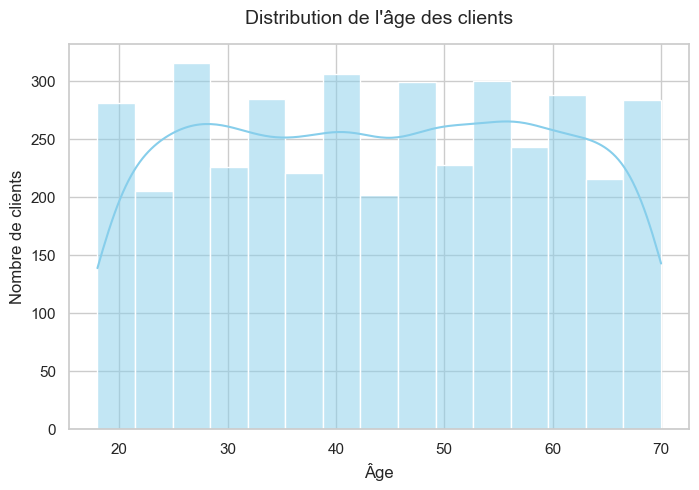

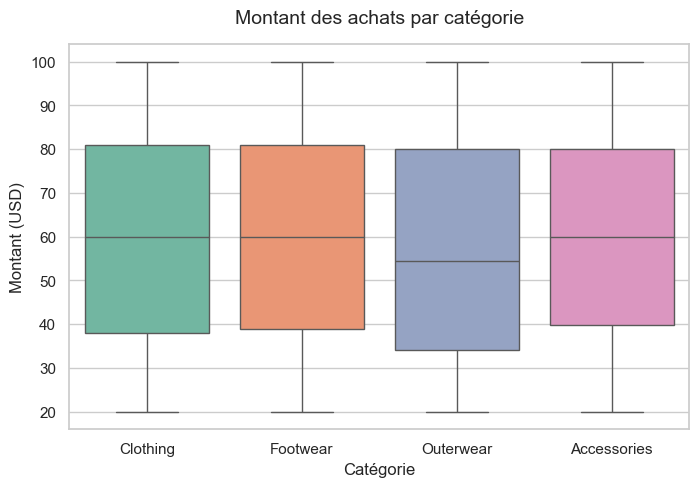

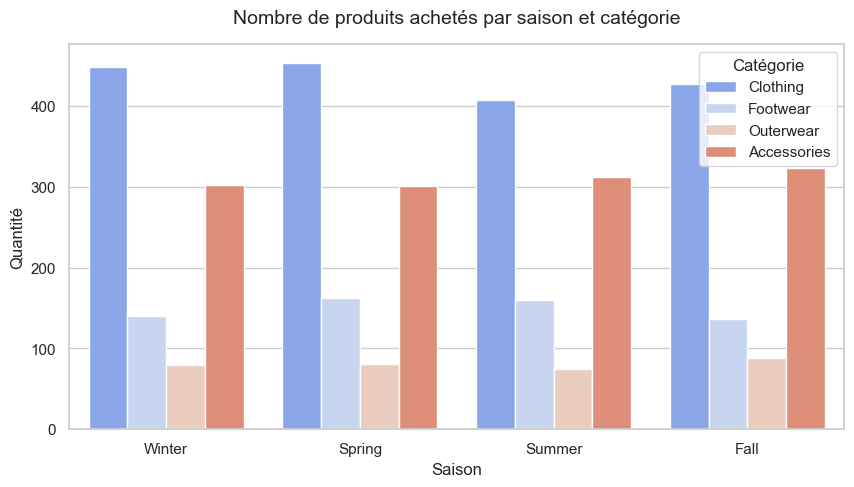

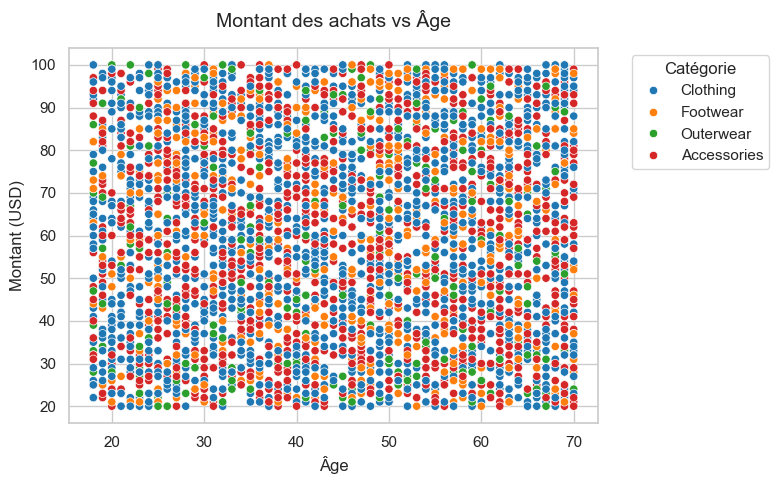

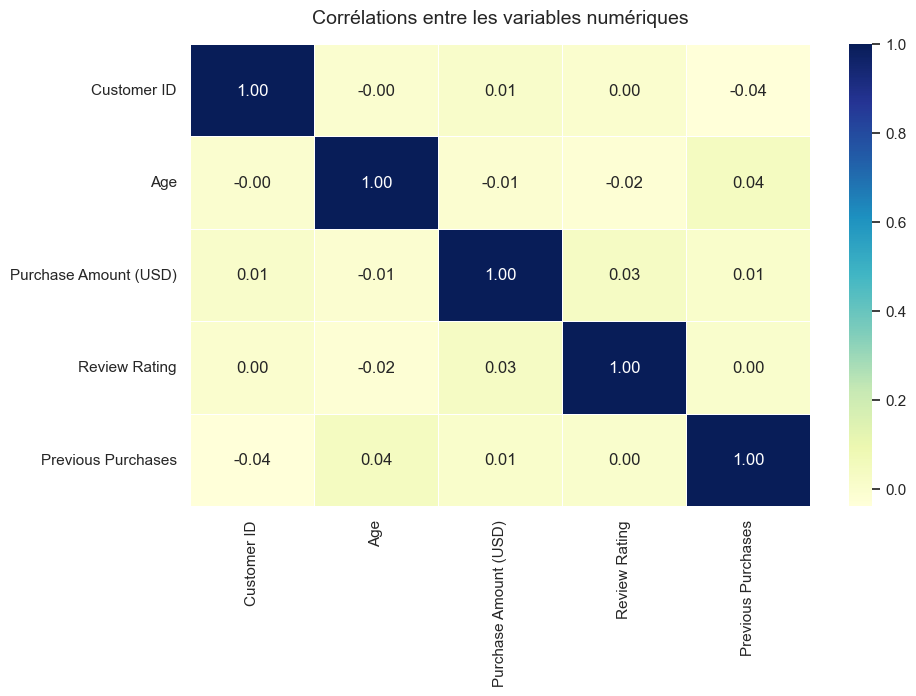

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration du style visuel
sns.set_theme(style="whitegrid")

# Chemin dynamique adaptatif (Git-Ready)
if os.path.exists("03-Retail-Consumer-Insights/shopping.csv"):
    file_path = "03-Retail-Consumer-Insights/shopping.csv"
else:
    file_path = "shopping.csv"

if os.path.exists(file_path):
    print(f"⏳ Chargement des données depuis : {file_path} ...")
    df = pd.read_csv(file_path)
    print("✅ Fichier chargé avec succès !\n")

    # ==========================================
    # 1. APERÇU ET STATISTIQUES DESCRIPTIVES
    # ==========================================
    print("--- Informations Générales ---")
    print(df.info())
    
    print("\n--- Valeurs Manquantes ---")
    print(df.isnull().sum())

    print(f"\n💳 Moyenne du montant des achats : {df['Purchase Amount (USD)'].mean():.2f} USD")
    
    print("\n--- Distribution par Catégorie ---")
    print(df['Category'].value_counts())

    print("\n--- Distribution par Genre ---")
    print(df['Gender'].value_counts())

    # ==========================================
    # 2. VISUALISATIONS DE DONNÉES
    # ==========================================

    # --- GRAPHIQUE 1 : Histogramme de l'âge ---
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
    plt.title("Distribution de l'âge des clients", fontsize=14, pad=15)
    plt.xlabel("Âge", fontsize=12)
    plt.ylabel("Nombre de clients", fontsize=12)
    plt.show()

    # --- GRAPHIQUE 2 : Boxplot du montant par catégorie ---
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Category', y='Purchase Amount (USD)', hue='Category', data=df, palette="Set2", legend=False)
    plt.title("Montant des achats par catégorie", fontsize=14, pad=15)
    plt.xlabel("Catégorie", fontsize=12)
    plt.ylabel("Montant (USD)", fontsize=12)
    plt.show()

    # --- GRAPHIQUE 3 : Countplot des produits par saison ---
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Season', hue='Category', data=df, palette="coolwarm")
    plt.title("Nombre de produits achetés par saison et catégorie", fontsize=14, pad=15)
    plt.xlabel("Saison", fontsize=12)
    plt.ylabel("Quantité", fontsize=12)
    plt.legend(title="Catégorie")
    plt.show()

    # --- GRAPHIQUE 4 : Scatterplot Montant vs Âge ---
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Category', data=df, palette="tab10")
    plt.title("Montant des achats vs Âge", fontsize=14, pad=15)
    plt.xlabel("Âge", fontsize=12)
    plt.ylabel("Montant (USD)", fontsize=12)
    plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc='upper left') # Sort la légende du graphique
    plt.tight_layout() # Ajuste les marges
    plt.show()

    # --- GRAPHIQUE 5 : Heatmap des corrélations numériques ---
    plt.figure(figsize=(10, 6))
    # Extraction des colonnes numériques uniquement pour éviter les erreurs de corrélation
    numeric_df = df.select_dtypes(include=['number'])
    sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
    plt.title("Corrélations entre les variables numériques", fontsize=14, pad=15)
    plt.show()

else:
    print("❌ Erreur : Impossible de trouver le fichier CSV. Vérifie l'arborescence du projet.")